<a href="https://colab.research.google.com/github/rukka0808/Deep-Learning-Study/blob/main/EU_Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving EU_img.jpg to EU_img (2).jpg


{'EU_img.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xed\x00$Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x08\x1c\x02x\x00\x03384\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x03\x84\x05\xa0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x1b\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x0

In [2]:
!ls -al

total 604
drwxr-xr-x 1 root root   4096 Aug  1 08:19  .
drwxr-xr-x 1 root root   4096 Aug  1 07:58  ..
drwxr-xr-x 4 root root   4096 Jul 16 13:19  .config
-rw-r--r-- 1 root root 197012 Aug  1 08:16 'EU_img (1).jpg'
-rw-r--r-- 1 root root 197012 Aug  1 08:19 'EU_img (2).jpg'
-rw-r--r-- 1 root root 197012 Aug  1 08:01  EU_img.jpg
drwxr-xr-x 1 root root   4096 Jul 16 13:20  sample_data


In [3]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

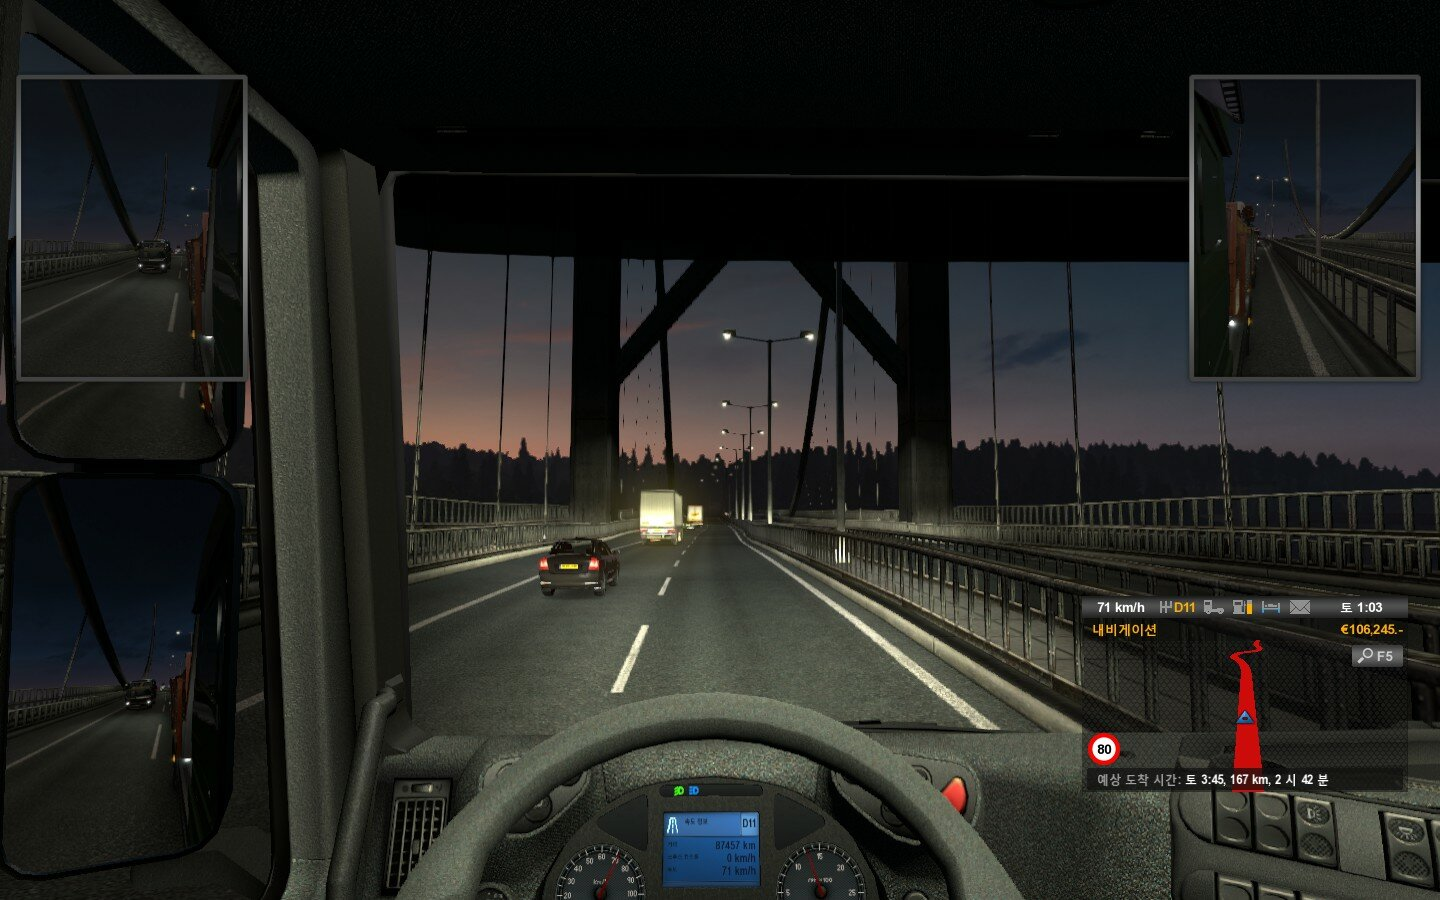

900 1440 3


In [4]:
file_name='EU_img.jpg'
frame = cv2.imread(file_name)
cv2_imshow(frame)
height, width, channels = frame.shape
print(height, width, channels)

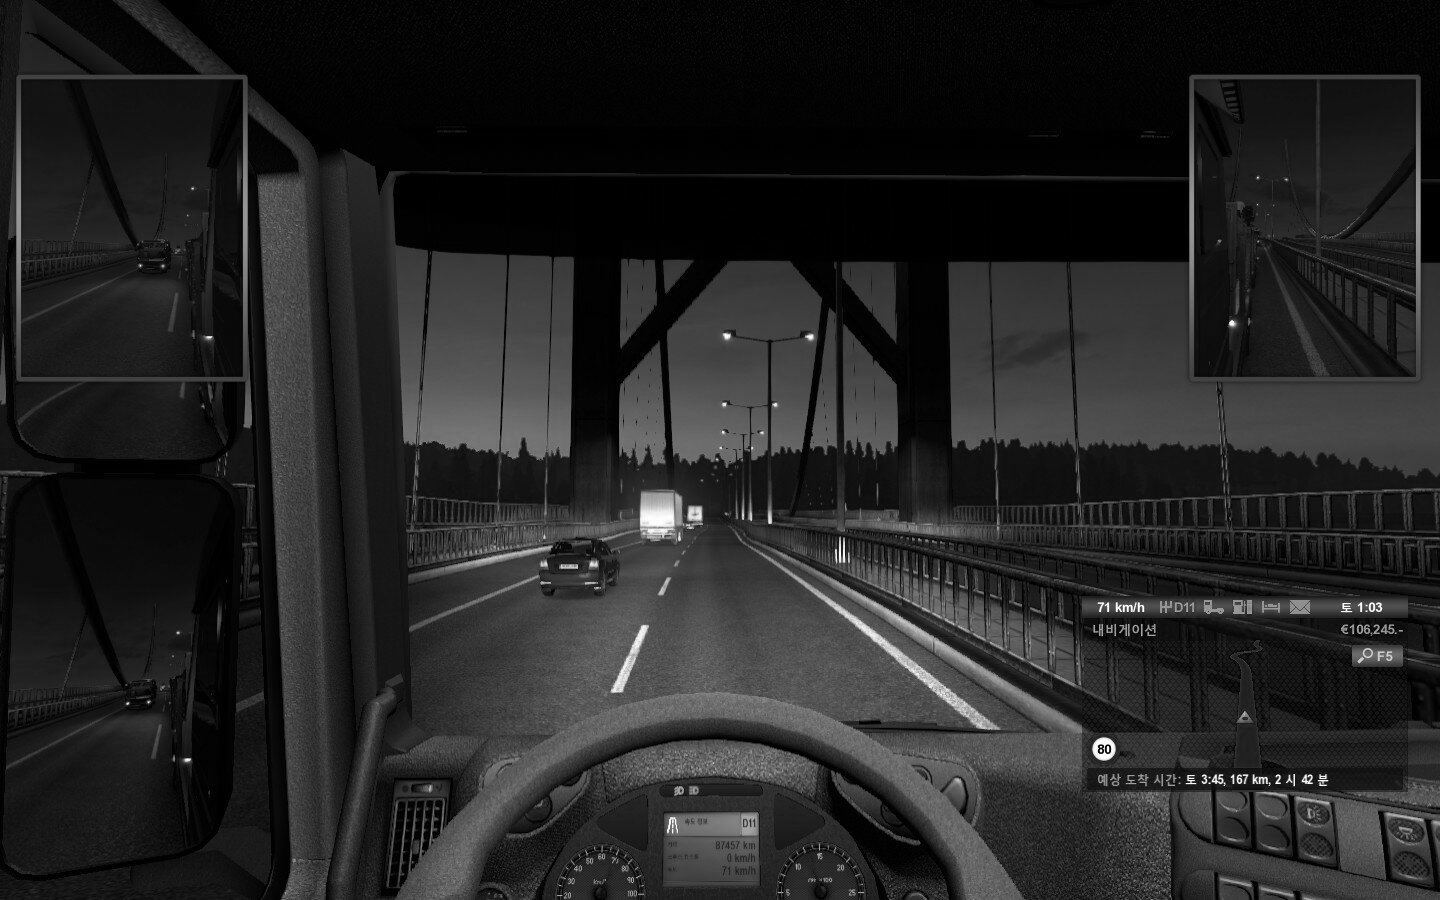

900 1440


In [22]:
# Conver the image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)
height, width = gray.shape
print(height, width)

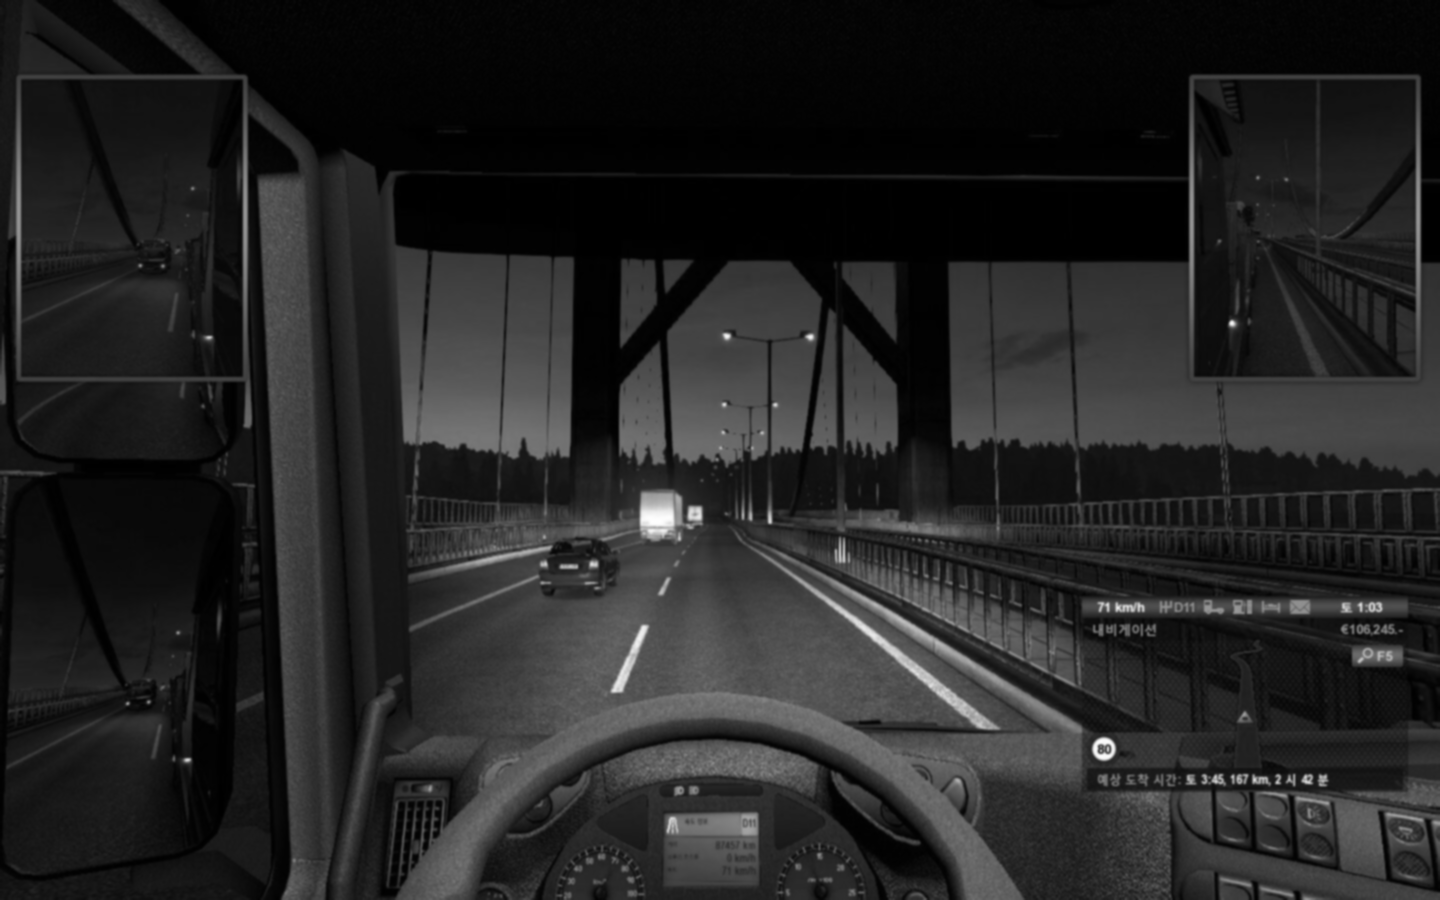

In [33]:
# GaussianBlur for refucing noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blur)

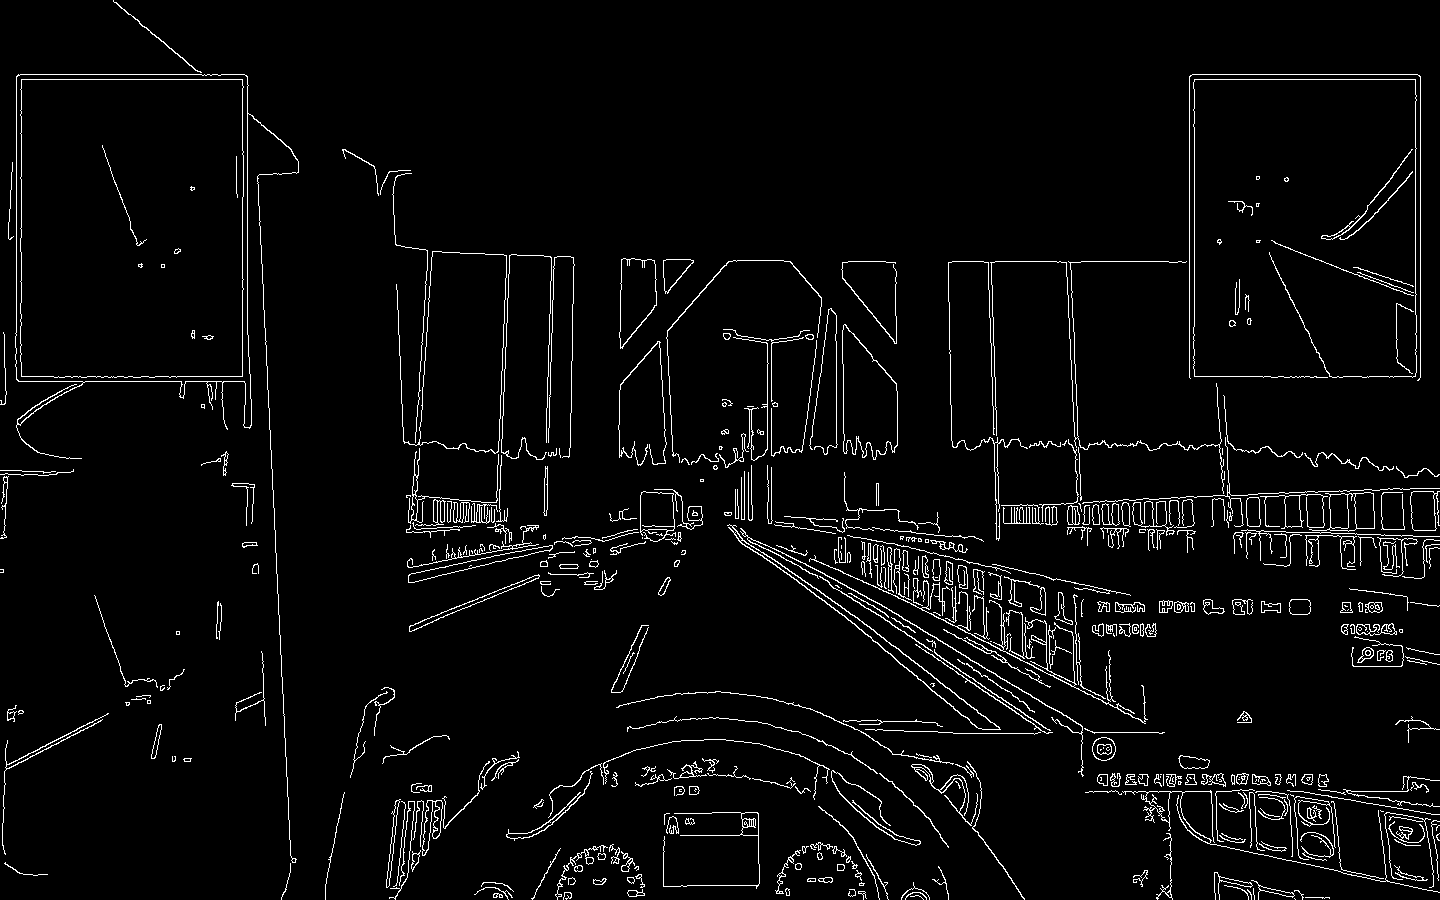

In [52]:
canny = cv2.Canny(blur, 40, 130)
cv2_imshow(canny)

In [ ]:
mask = np.zeros((height,width), dtype='uint8')
cv2_imshow(mask)

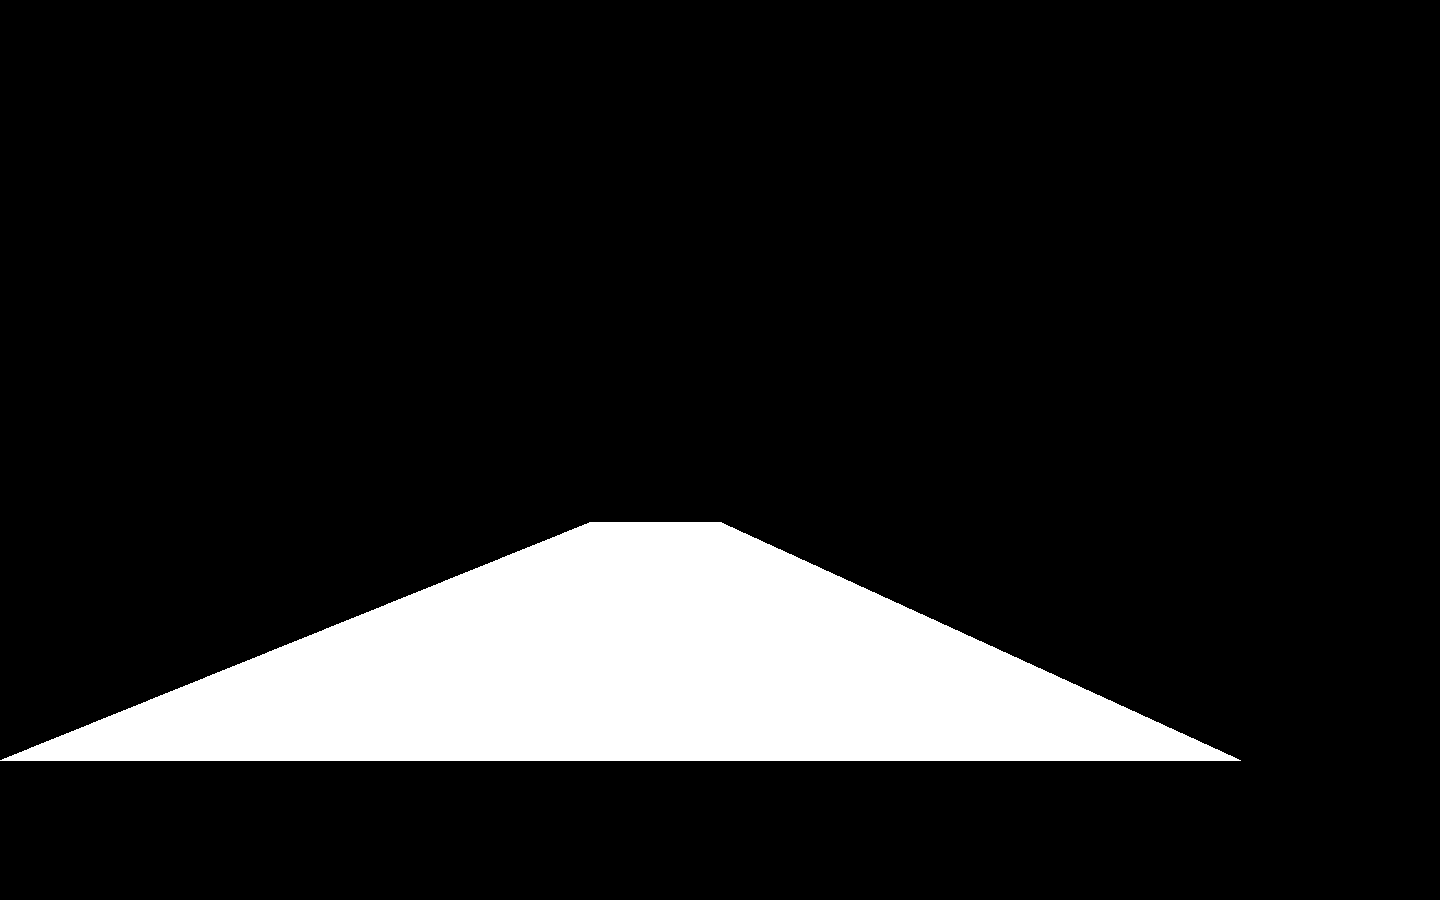

In [54]:
poly_heigh = int(0.58 * height)
poly_left = int(0.41 * width)
poly_right = int(0.50 * width)
polygons = np.array([[(0,height-140), (poly_left, poly_heigh), (poly_right, poly_heigh), (width-200, height-140)]])
cv2.fillPoly(mask, polygons, 255)
cv2_imshow(mask)

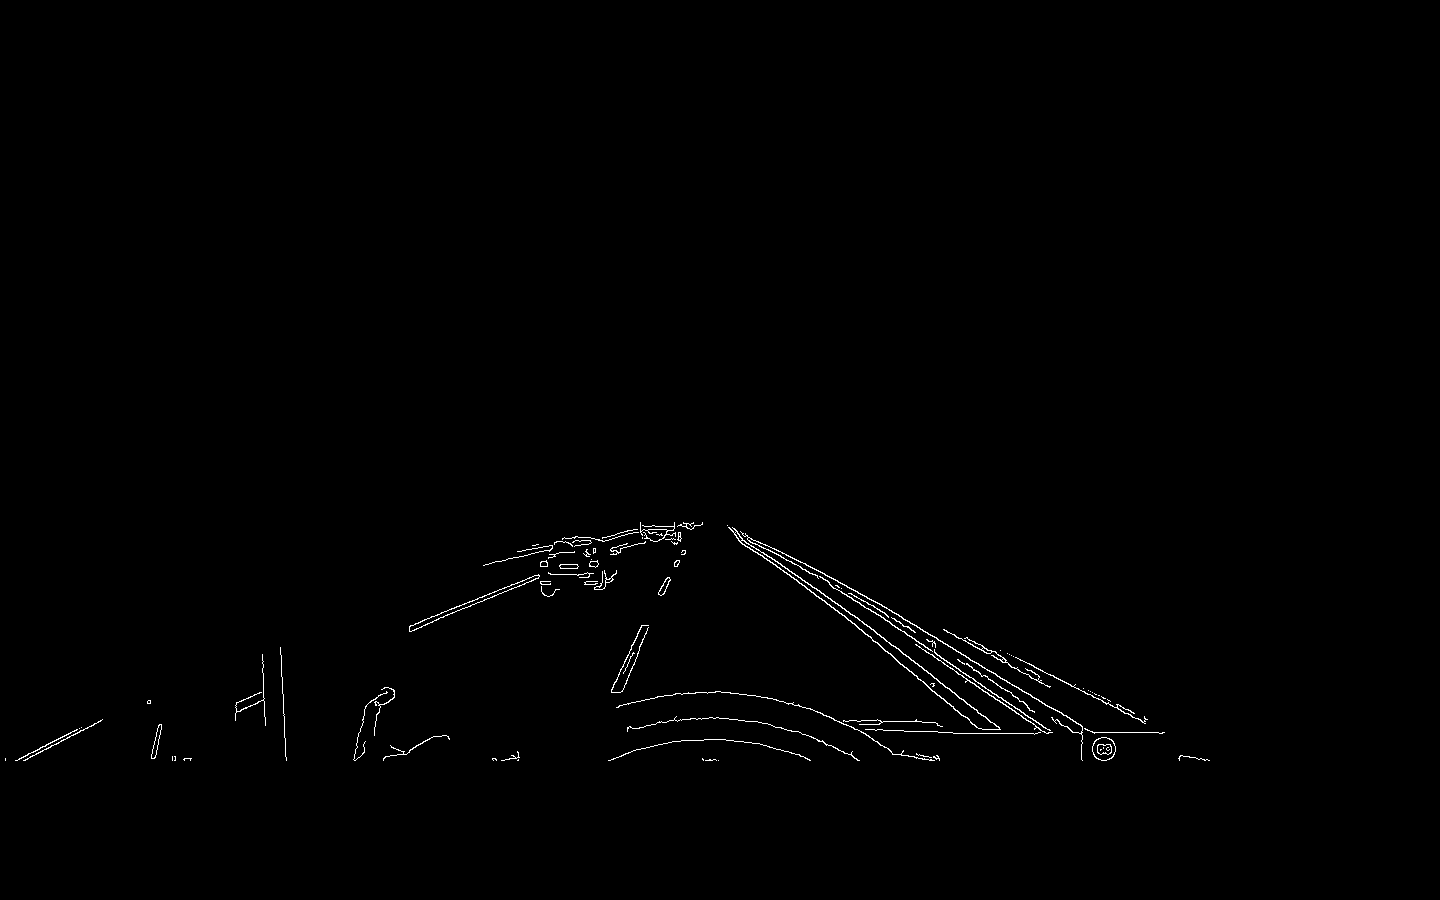

In [55]:
# Bitwise operation between poly and mask
masked = cv2.bitwise_and(canny, mask)
cv2_imshow(masked)